In [1]:
import sys

sys.path.append('/home/alta/Conversational/OET/al826/2022/conv_frameworks/parallel_exp')

In [2]:
from src.eval.integrad_handler import IntegradHandler

E = IntegradHandler('sep_focus_utt/full/0', hpc=True)
#E.parallelise()

Model found!


In [3]:
from types import SimpleNamespace

eval_path = f"swda/standard/test.json"

test_args = {'eval_path':eval_path,
             'bsz':2,
             'lim':None}

test_args = SimpleNamespace(**test_args)

words, scores = E.saliency(test_args, N=20, utt_num=31)


100%|██████████| 19/19 [00:00<00:00, 49.99it/s]


31
multi_segment 0.975


  0%|          | 0/10 [00:00<?, ?it/s]

[0.49404535070061684, 0.08724021883972455, 0.036012822296470404, 0.03411695017712191, 0.03398733149515465, 0.033416295516872196, 0.024441918970296683, 0.024187074312067125, 0.018557941599283367, 0.014002194977365434, 0.012914050341350958, 0.009320357494289055, 0.00801871527505682, 0.00770352830295451, 0.0070607841244054725, 0.006976895791012794, 0.0064705889381002635, 0.006433082744479179, 0.00570575067831669, 0.004489189901505597, 0.003912346824108681, 0.0037871446893404936, 0.003644782536866842, 0.0035059622023254633, 0.00333337411575485, 0.00329361615513335, 0.0030340953962877393, 0.0028489071410149336, 0.0019542684058251325, 0.0016869376445356465, 0.0016640610142530932, 0.0015029499081720132, 0.001434765602425614, 0.0012364460271783173, 0.0010992899537995982, 0.0010083050146931782, 0.000900743461897946, 0.0008787907568148512, 0.0007391910839942284, 0.00030747681375942193, 0.0003031048818229465, 0.00023942163807078032, 0.0002301775002706563, 0.0002010194716604019, 0.0001329848198565

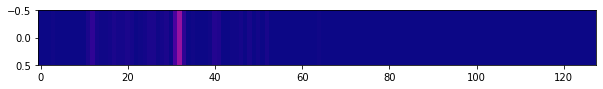

In [4]:
import matplotlib.pyplot as plt
import numpy as np

words = [i.replace('<s>', '[CLS]') for i in words]
words = [i.replace('</s>', '[SEP]') for i in words]
s = [0] + [k for k, word in enumerate(words) if word == '[SEP]']
turn_scores = [sum(scores[s[i]:s[i+1]]) for i in range(len(s)-1)]
print(sorted(turn_scores)[::-1])

#temp
plt.rcParams["figure.figsize"] = 10,1

dist = [abs(i) for i in turn_scores]
dist = np.array(dist)/sum(dist)
plt.imshow(dist[np.newaxis,:], cmap="plasma", aspect="auto", vmin=0, vmax=1)
plt.show()
